# Extract-Transform-Load some Amazon dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the dataset
import pandas as pd
Amazon_Sales= pd.read_csv("/content/drive/MyDrive/Amazon Unified Project 1/Amazon Sales data.csv")
Amazon_Sales

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [ ]:
# Convert date columns to datetime format
Amazon_Sales['Order Date'] = pd.to_datetime(Amazon_Sales['Order Date'])
Amazon_Sales['Ship Date'] = pd.to_datetime(Amazon_Sales['Ship Date'])

In [ ]:
# Extract month and year from the order date
Amazon_Sales['Order Year'] = Amazon_Sales['Order Date'].dt.year
Amazon_Sales['Order Month'] = Amazon_Sales['Order Date'].dt.month
Amazon_Sales['Year-Month'] = Amazon_Sales['Order Date'].dt.to_period('M')

Amazon_Sales.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month,Year-Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02


#  Finding Sales-trend -> month-wise, year-wise, yearly_month-wise


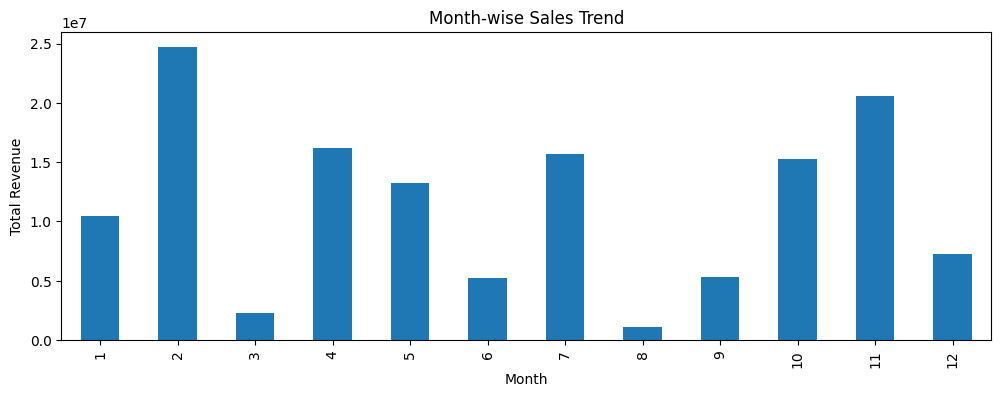

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate month-wise sales trend
monthly_sales_trend = Amazon_Sales.groupby('Order Month')['Total Revenue'].sum()
plt.figure(figsize=(12, 4))
monthly_sales_trend.plot(kind='bar')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


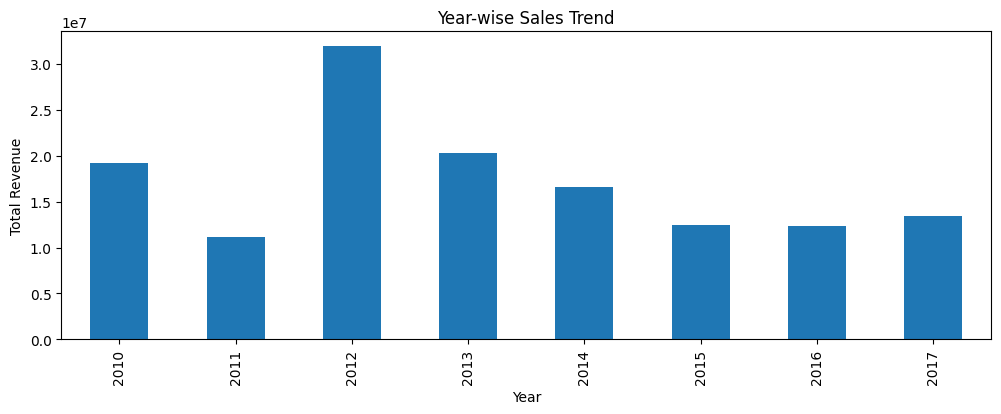

In [ ]:
# Calculate year-wise sales trend
annual_sales_trend = Amazon_Sales.groupby('Order Year')['Total Revenue'].sum()

plt.figure(figsize=(12, 4))
annual_sales_trend.plot(kind='bar')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()


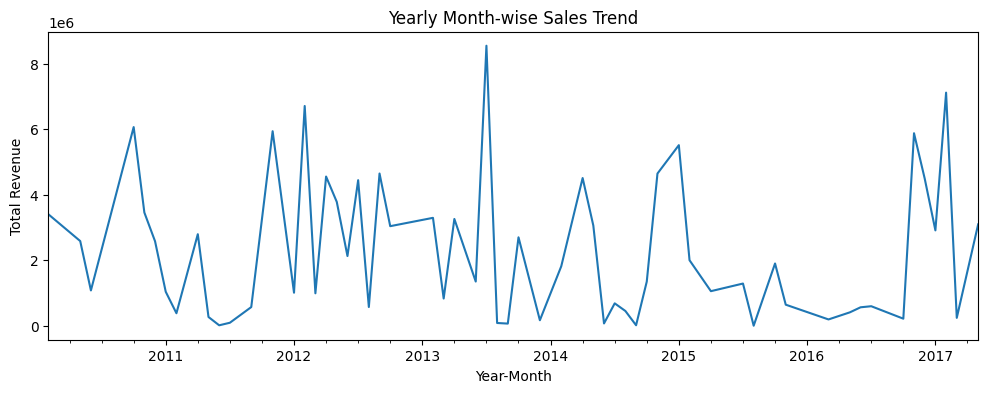

In [ ]:
# Calculate yearly month-wise sales trend
monthly_sales_trend_by_year = Amazon_Sales.groupby('Year-Month')['Total Revenue'].sum()

plt.figure(figsize=(12, 4))
monthly_sales_trend_by_year.plot()
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.show()


# Find key metrics and factors and show the meaningful relationships between
attributes

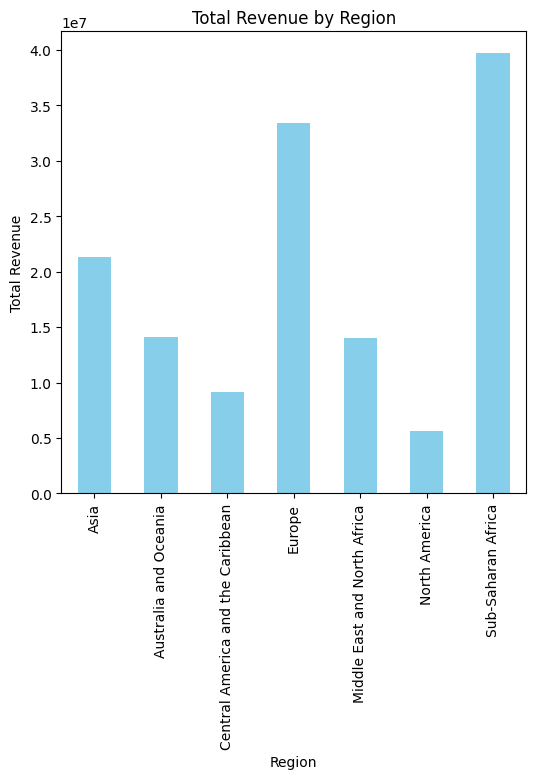

In [ ]:
# Total Revenue by Region
total_revenue_by_region = Amazon_Sales.groupby('Region')['Total Revenue'].sum()

plt.figure(figsize=(6, 6))
total_revenue_by_region.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

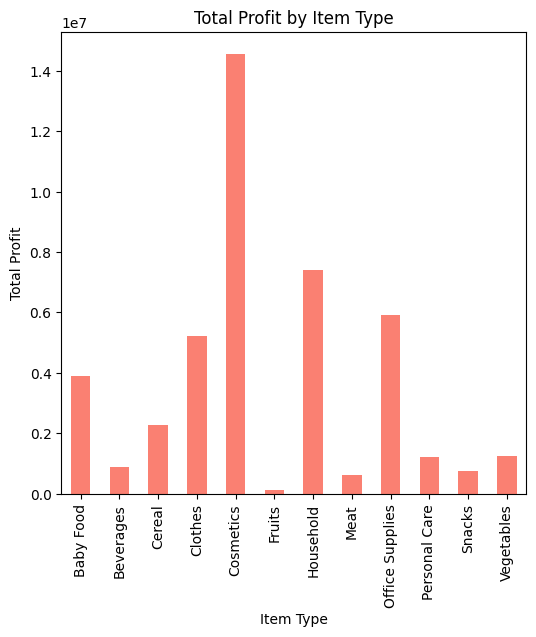

In [ ]:
# Total Profit by Item Type
total_profit_by_item_type = Amazon_Sales.groupby('Item Type')['Total Profit'].sum()
plt.figure(figsize=(6, 6))
total_profit_by_item_type.plot(kind='bar', color='salmon')
plt.title('Total Profit by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.show()


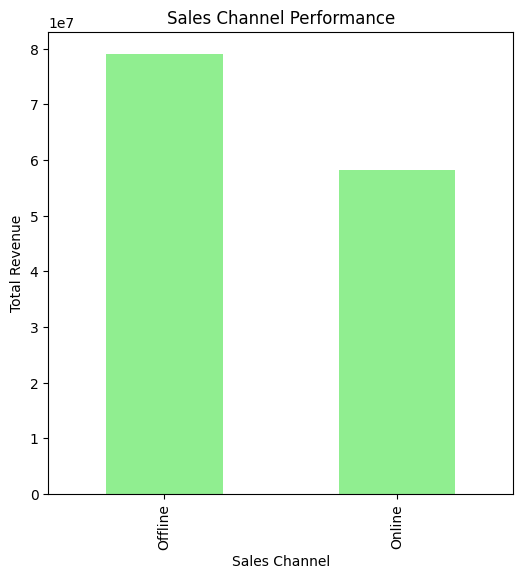

In [ ]:
# Sales Channel Performance
revenue_by_sales_channel = Amazon_Sales.groupby('Sales Channel')['Total Revenue'].sum()

plt.figure(figsize=(6, 6))
revenue_by_sales_channel.plot(kind='bar', color='lightgreen')
plt.title('Sales Channel Performance')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.show()


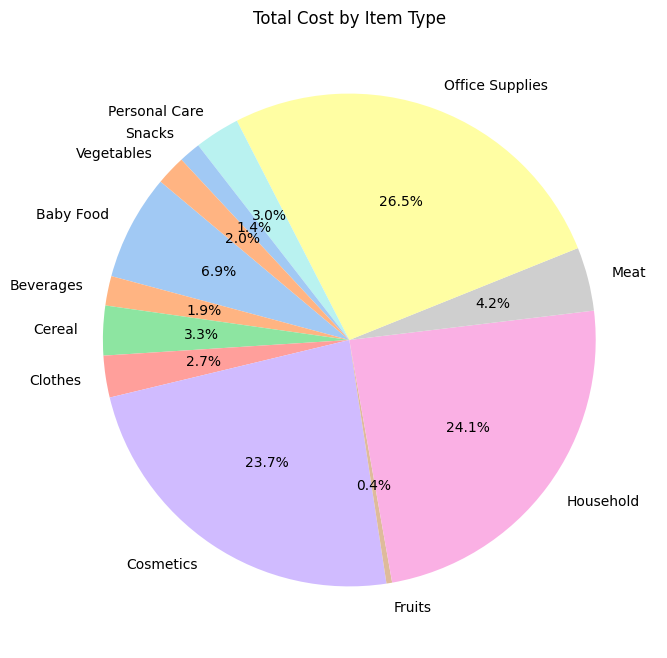

In [ ]:
# Total Cost by Item Type
total_cost_by_item_type = Amazon_Sales.groupby('Item Type')['Total Cost'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
total_cost_by_item_type.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Total Cost by Item Type')
plt.ylabel('')
plt.show()
